## Imports

In [6]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

##### Import the data

In [7]:
df = pd.read_csv('Fire_Department_Calls_for_Service.csv').iloc[:2000 :]

FileNotFoundError: [Errno 2] No such file or directory: 'Fire_Department_Calls_for_Service.csv'

In [32]:
df.to_csv('fire_department_truncated.csv')

In [33]:
df.tail()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID
1995,1110045,E43,32940,Structure Fire,04/20/2000,04/20/2000,04/20/2000 08:09:54 AM,04/20/2000 08:18:07 AM,04/20/2000 08:18:18 AM,04/20/2000 08:19:21 AM,...,False,NaN,1,ENGINE,1.0,9,11,Excelsior,"(37.7247251220887, -122.430453102329)",001110045-E43
1996,1110045,T15,32940,Structure Fire,04/20/2000,04/20/2000,04/20/2000 08:09:54 AM,04/20/2000 08:18:07 AM,04/20/2000 08:18:18 AM,04/20/2000 08:19:21 AM,...,False,NaN,1,TRUCK,2.0,9,11,Excelsior,"(37.7247251220887, -122.430453102329)",001110045-T15
1997,1110048,RA32,32943,Medical Incident,04/20/2000,04/20/2000,04/20/2000 08:30:24 AM,04/20/2000 08:32:16 AM,04/20/2000 08:33:06 AM,04/20/2000 08:33:41 AM,...,False,NaN,1,AIRPORT,1.0,10,10,Potrero Hill,"(37.7536098398255, -122.397099082289)",001110048-RA32
1998,1110049,E01,32944,Medical Incident,04/20/2000,04/20/2000,04/20/2000 08:34:43 AM,04/20/2000 08:36:08 AM,04/20/2000 08:36:37 AM,04/20/2000 08:39:17 AM,...,False,NaN,1,ENGINE,1.0,3,6,South of Market,"(37.7773283973146, -122.407203031938)",001110049-E01
1999,1110049,M08,32944,Medical Incident,04/20/2000,04/20/2000,04/20/2000 08:34:43 AM,04/20/2000 08:36:08 AM,04/20/2000 08:36:37 AM,04/20/2000 08:38:29 AM,...,True,NaN,1,MEDIC,2.0,3,6,South of Market,"(37.7773283973146, -122.407203031938)",001110049-M08


##### drop any empty cells

In [36]:
columns_to_drop = ["Call Number", "Incident Number", "Call Type Group", "RowID", "Call Date", "Hospital DtTm", "Call Final Disposition", "Available DtTm", "Address"]
rows_to_keep = ["Structure Fire"]

In [37]:
df = df.drop(columns_to_drop, axis=1)

In [38]:
df

,Unit ID,Call Type,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,City,...,Priority,Final Priority,ALS Unit,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location
0,E18,Medical Incident,04/12/2000,04/12/2000 09:00:29 PM,04/12/2000 09:01:40 PM,04/12/2000 09:02:00 PM,NaN,NaN,NaN,SF,...,3,3,False,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)"
1,M14,Medical Incident,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,04/12/2000 09:19:36 PM,04/12/2000 09:43:57 PM,SF,...,3,3,True,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)"
2,M36,Medical Incident,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,04/12/2000 09:14:11 PM,04/12/2000 09:59:31 PM,SF,...,3,3,False,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)"
3,E01,Alarms,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,04/12/2000 09:20:12 PM,NaN,SF,...,3,3,False,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)"
4,RS1,Medical Incident,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,04/12/2000 09:20:08 PM,NaN,SF,...,3,3,False,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,E43,Structure Fire,04/20/2000,04/20/2000 08:09:54 AM,04/20/2000 08:18:07 AM,04/20/2000 08:18:18 AM,04/20/2000 08:19:21 AM,04/20/2000 08:21:44 AM,NaN,SF,...,3,3,False,1,ENGINE,1.0,9,11,Excelsior,"(37.7247251220887, -122.430453102329)"
1996,T15,Structure Fire,04/20/2000,04/20/2000 08:09:54 AM,04/20/2000 08:18:07 AM,04/20/2000 08:18:18 AM,04/20/2000 08:19:21 AM,NaN,NaN,SF,...,3,3,False,1,TRUCK,2.0,9,11,Excelsior,"(37.7247251220887, -122.430453102329)"
1997,RA32,Medical Incident,04/20/2000,04/20/2000 08:30:24 AM,04/20/2000 08:32:16 AM,04/20/2000 08:33:06 AM,04/20/2000 08:33:41 AM,04/20/2000 08:46:58 AM,04/20/2000 09:03:02 AM,SF,...,1,2,False,1,AIRPORT,1.0,10,10,Potrero Hill,"(37.7536098398255, -122.397099082289)"
1998,E01,Medical Incident,04/20/2000,04/20/2000 08:34:43 AM,04/20/2000 08:36:08 AM,04/20/2000 08:36:37 AM,04/20/2000 08:39:17 AM,04/20/2000 08:39:43 AM,NaN,SF,...,3,3,False,1,ENGINE,1.0,3,6,South of Market,"(37.7773283973146, -122.407203031938)"


In [39]:
df = df.loc[df["Call Type"].isin(rows_to_keep)]

In [ ]:
df

In [41]:
df.to_csv("fire_incidents_sanfran.csv")

C:\Users\rhani\AppData\Local\Temp\ipykernel_14272\569657107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall', min_periods=1)


<AxesSubplot: >

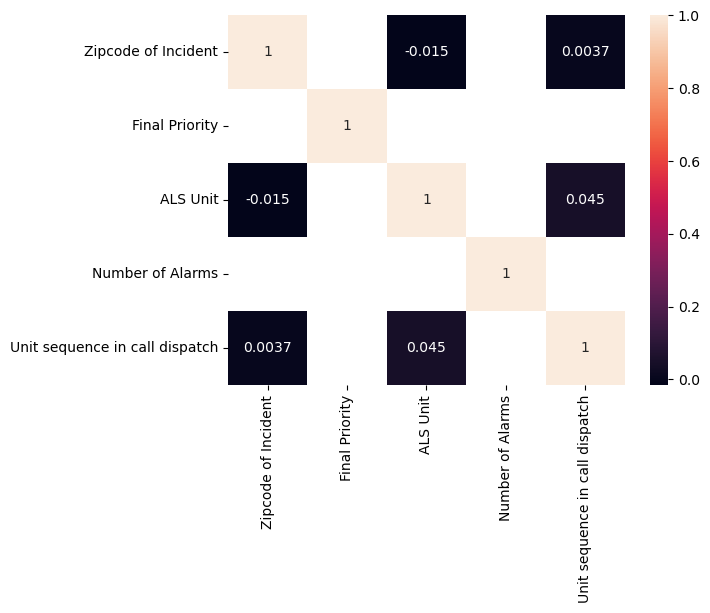

In [44]:
corr = df.corr(method='kendall', min_periods=1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [ ]:
df